In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))


618


## Perform API Calls

In [20]:
#create df
weather_df = pd.DataFrame({"City":cities,
                           "Temperature":"",
                           "Humidity":"",
                           "Cloudiness":"",
                           "Wind Speed":""
})



# OpenWeatherMap API Key
api_key = api_keys.api_key

weather_df.head()
api_key

'a58509ec13b69fb2ddc509a7404ef42d'

In [4]:
# use iterrows to iterate through pandas dataframe
for index, row in weather_df.iterrows():

    # get restaurant type from df
    cityname = row['City']

    # create url
    url = f"http://api.openweathermap.org/data/2.5/weather?q={cityname}&units=imperial&APPID=" + api_key

    # assemble url and make API request
    print(f"Retrieving Results for Index {index}: {cityname}.")
    response = requests.get(url).json()
    #Grabbing data

    
    #Output results
    try:
        temp = response['main']['temp_max']
        humid = response['main']['humidity']
        cloud = response['clouds']['all']
        wind = response['wind']['speed']
        lat = response['coord']['lat']
        lng = response['coord']['lon']
    
        print(f"In {cityname}, the temp is {temp}F, the humidity is {humid},the cloudiness is {cloud}, and the wind speed is {wind}.")
        
        weather_df.loc[index, 'Latitude'] = lat
        weather_df.loc[index, 'Longitude'] = lng
        weather_df.loc[index, 'Max Temperature'] = temp
        weather_df.loc[index, 'Humidity'] = humid
        weather_df.loc[index, 'Cloudiness'] = cloud
        weather_df.loc[index, 'Wind Speed'] = wind
        
        
    except (KeyError, IndexError):
        print(f"Missing field/result... skipping. URL:{url}")
        
    print("------------")
    time.sleep(3)

Retrieving Results for Index 0: malindi.
In malindi, the temp is 77.03F, the humidity is 82,the cloudiness is 80, and the wind speed is 11.65.
------------
Retrieving Results for Index 1: vao.
In vao, the temp is 45.44F, the humidity is 100,the cloudiness is 88, and the wind speed is 5.39.
------------
Retrieving Results for Index 2: bokspits.
Missing field/result... skipping. URL:http://api.openweathermap.org/data/2.5/weather?q=bokspits&units=imperial&APPID=a58509ec13b69fb2ddc509a7404ef42d
------------
Retrieving Results for Index 3: hithadhoo.
In hithadhoo, the temp is 78.11F, the humidity is 100,the cloudiness is 88, and the wind speed is 17.47.
------------
Retrieving Results for Index 4: arraial do cabo.
In arraial do cabo, the temp is 73.52F, the humidity is 95,the cloudiness is 92, and the wind speed is 3.15.
------------
Retrieving Results for Index 5: minna.
In minna, the temp is 69.83F, the humidity is 98,the cloudiness is 88, and the wind speed is 5.17.
------------
Retrievi

In fukue, the temp is 71.6F, the humidity is 56,the cloudiness is 20, and the wind speed is 5.82.
------------
Retrieving Results for Index 51: puerto ayora.
In puerto ayora, the temp is 70.55F, the humidity is 100,the cloudiness is 8, and the wind speed is 11.65.
------------
Retrieving Results for Index 52: carnarvon.
In carnarvon, the temp is 52.37F, the humidity is 18,the cloudiness is 8, and the wind speed is 10.2.
------------
Retrieving Results for Index 53: ushuaia.
In ushuaia, the temp is 35.6F, the humidity is 74,the cloudiness is 40, and the wind speed is 4.7.
------------
Retrieving Results for Index 54: pindi bhattian.
In pindi bhattian, the temp is 76.67F, the humidity is 67,the cloudiness is 0, and the wind speed is 4.38.
------------
Retrieving Results for Index 55: mys shmidta.
Missing field/result... skipping. URL:http://api.openweathermap.org/data/2.5/weather?q=mys shmidta&units=imperial&APPID=a58509ec13b69fb2ddc509a7404ef42d
------------
Retrieving Results for Index

------------
Retrieving Results for Index 100: minas novas.
In minas novas, the temp is 74.51F, the humidity is 62,the cloudiness is 32, and the wind speed is 11.99.
------------
Retrieving Results for Index 101: butaritari.
In butaritari, the temp is 84.5F, the humidity is 100,the cloudiness is 76, and the wind speed is 3.71.
------------
Retrieving Results for Index 102: kurashiki.
In kurashiki, the temp is 68.13F, the humidity is 63,the cloudiness is 40, and the wind speed is 3.36.
------------
Retrieving Results for Index 103: kaitangata.
In kaitangata, the temp is 48.23F, the humidity is 79,the cloudiness is 32, and the wind speed is 15.46.
------------
Retrieving Results for Index 104: cherskiy.
In cherskiy, the temp is 44.27F, the humidity is 68,the cloudiness is 56, and the wind speed is 2.71.
------------
Retrieving Results for Index 105: hofn.
In hofn, the temp is 40.22F, the humidity is 100,the cloudiness is 0, and the wind speed is 14.79.
------------
Retrieving Results for

Retrieving Results for Index 150: grenaa.
In grenaa, the temp is 44.6F, the humidity is 93,the cloudiness is 76, and the wind speed is 8.05.
------------
Retrieving Results for Index 151: havoysund.
In havoysund, the temp is 35.6F, the humidity is 64,the cloudiness is 75, and the wind speed is 16.11.
------------
Retrieving Results for Index 152: qaanaaq.
In qaanaaq, the temp is 15.74F, the humidity is 100,the cloudiness is 0, and the wind speed is 13.78.
------------
Retrieving Results for Index 153: margate.
In margate, the temp is 60.8F, the humidity is 55,the cloudiness is 40, and the wind speed is 10.29.
------------
Retrieving Results for Index 154: markova.
In markova, the temp is 50F, the humidity is 61,the cloudiness is 0, and the wind speed is 2.24.
------------
Retrieving Results for Index 155: baykit.
In baykit, the temp is 38.96F, the humidity is 85,the cloudiness is 32, and the wind speed is 13.67.
------------
Retrieving Results for Index 156: kindu.
In kindu, the temp i

Retrieving Results for Index 200: vostok.
In vostok, the temp is 50.48F, the humidity is 59,the cloudiness is 0, and the wind speed is 4.61.
------------
Retrieving Results for Index 201: narsaq.
In narsaq, the temp is 33.8F, the humidity is 47,the cloudiness is 32, and the wind speed is 20.8.
------------
Retrieving Results for Index 202: bambous virieux.
In bambous virieux, the temp is 71.6F, the humidity is 83,the cloudiness is 75, and the wind speed is 10.29.
------------
Retrieving Results for Index 203: bonthe.
In bonthe, the temp is 73.43F, the humidity is 100,the cloudiness is 88, and the wind speed is 4.16.
------------
Retrieving Results for Index 204: sorland.
In sorland, the temp is 47.15F, the humidity is 100,the cloudiness is 92, and the wind speed is 3.94.
------------
Retrieving Results for Index 205: pangnirtung.
In pangnirtung, the temp is 27.17F, the humidity is 93,the cloudiness is 80, and the wind speed is 11.77.
------------
Retrieving Results for Index 206: sumba

In koulikoro, the temp is 73.4F, the humidity is 94,the cloudiness is 20, and the wind speed is 4.7.
------------
Retrieving Results for Index 250: richards bay.
In richards bay, the temp is 65.42F, the humidity is 75,the cloudiness is 0, and the wind speed is 5.95.
------------
Retrieving Results for Index 251: smithers.
In smithers, the temp is 41F, the humidity is 52,the cloudiness is 90, and the wind speed is 3.36.
------------
Retrieving Results for Index 252: lugovoy.
In lugovoy, the temp is 39.86F, the humidity is 90,the cloudiness is 88, and the wind speed is 9.64.
------------
Retrieving Results for Index 253: poum.
In poum, the temp is 36.53F, the humidity is 87,the cloudiness is 0, and the wind speed is 1.7.
------------
Retrieving Results for Index 254: tilichiki.
In tilichiki, the temp is 43.91F, the humidity is 96,the cloudiness is 92, and the wind speed is 15.35.
------------
Retrieving Results for Index 255: merauke.
In merauke, the temp is 78.38F, the humidity is 94,th

Retrieving Results for Index 300: limbang.
In limbang, the temp is 86.67F, the humidity is 66,the cloudiness is 75, and the wind speed is 4.7.
------------
Retrieving Results for Index 301: sarakhs.
In sarakhs, the temp is 59F, the humidity is 44,the cloudiness is 0, and the wind speed is 6.93.
------------
Retrieving Results for Index 302: bonavista.
In bonavista, the temp is 47.51F, the humidity is 100,the cloudiness is 0, and the wind speed is 19.48.
------------
Retrieving Results for Index 303: dunedin.
In dunedin, the temp is 44.72F, the humidity is 100,the cloudiness is 92, and the wind speed is 12.1.
------------
Retrieving Results for Index 304: fengcheng.
In fengcheng, the temp is 63.89F, the humidity is 59,the cloudiness is 0, and the wind speed is 3.83.
------------
Retrieving Results for Index 305: hamilton.
In hamilton, the temp is 78.8F, the humidity is 74,the cloudiness is 75, and the wind speed is 19.46.
------------
Retrieving Results for Index 306: palu.
In palu, the

Retrieving Results for Index 351: sao joao da barra.
In sao joao da barra, the temp is 75.77F, the humidity is 96,the cloudiness is 68, and the wind speed is 28.99.
------------
Retrieving Results for Index 352: cape elizabeth.
Missing field/result... skipping. URL:http://api.openweathermap.org/data/2.5/weather?q=cape elizabeth&units=imperial&APPID=a58509ec13b69fb2ddc509a7404ef42d
------------
Retrieving Results for Index 353: jucas.
In jucas, the temp is 79.46F, the humidity is 36,the cloudiness is 80, and the wind speed is 6.06.
------------
Retrieving Results for Index 354: ambanja.
In ambanja, the temp is 63.26F, the humidity is 73,the cloudiness is 0, and the wind speed is 2.93.
------------
Retrieving Results for Index 355: severnyy.
Missing field/result... skipping. URL:http://api.openweathermap.org/data/2.5/weather?q=severnyy&units=imperial&APPID=a58509ec13b69fb2ddc509a7404ef42d
------------
Retrieving Results for Index 356: ambasamudram.
In ambasamudram, the temp is 80.6F, the

Retrieving Results for Index 400: erzin.
In erzin, the temp is 69.35F, the humidity is 82,the cloudiness is 40, and the wind speed is 5.82.
------------
Retrieving Results for Index 401: fort nelson.
In fort nelson, the temp is 32F, the humidity is 59,the cloudiness is 75, and the wind speed is 6.93.
------------
Retrieving Results for Index 402: charters towers.
In charters towers, the temp is 77.3F, the humidity is 59,the cloudiness is 0, and the wind speed is 13.22.
------------
Retrieving Results for Index 403: ilulissat.
In ilulissat, the temp is 32F, the humidity is 100,the cloudiness is 75, and the wind speed is 13.87.
------------
Retrieving Results for Index 404: spirit river.
In spirit river, the temp is 30.2F, the humidity is 92,the cloudiness is 90, and the wind speed is 8.05.
------------
Retrieving Results for Index 405: yarada.
In yarada, the temp is 85.85F, the humidity is 99,the cloudiness is 0, and the wind speed is 3.83.
------------
Retrieving Results for Index 406:

Retrieving Results for Index 451: taltal.
In taltal, the temp is 53.18F, the humidity is 94,the cloudiness is 0, and the wind speed is 2.15.
------------
Retrieving Results for Index 452: bandarbeyla.
In bandarbeyla, the temp is 76.31F, the humidity is 97,the cloudiness is 8, and the wind speed is 16.02.
------------
Retrieving Results for Index 453: fortuna.
In fortuna, the temp is 67.12F, the humidity is 82,the cloudiness is 20, and the wind speed is 4.7.
------------
Retrieving Results for Index 454: aksarka.
In aksarka, the temp is 26.9F, the humidity is 91,the cloudiness is 20, and the wind speed is 10.31.
------------
Retrieving Results for Index 455: camalu.
In camalu, the temp is 68.3F, the humidity is 96,the cloudiness is 100, and the wind speed is 1.92.
------------
Retrieving Results for Index 456: victoria.
In victoria, the temp is 86.92F, the humidity is 79,the cloudiness is 75, and the wind speed is 3.36.
------------
Retrieving Results for Index 457: lata.
In lata, the t

Retrieving Results for Index 502: ilek.
In ilek, the temp is 29.96F, the humidity is 70,the cloudiness is 0, and the wind speed is 2.71.
------------
Retrieving Results for Index 503: luau.
In luau, the temp is 63.8F, the humidity is 67,the cloudiness is 8, and the wind speed is 2.71.
------------
Retrieving Results for Index 504: jabiru.
Missing field/result... skipping. URL:http://api.openweathermap.org/data/2.5/weather?q=jabiru&units=imperial&APPID=a58509ec13b69fb2ddc509a7404ef42d
------------
Retrieving Results for Index 505: tlahualilo.
Missing field/result... skipping. URL:http://api.openweathermap.org/data/2.5/weather?q=tlahualilo&units=imperial&APPID=a58509ec13b69fb2ddc509a7404ef42d
------------
Retrieving Results for Index 506: devils lake.
In devils lake, the temp is 50F, the humidity is 63,the cloudiness is 90, and the wind speed is 11.41.
------------
Retrieving Results for Index 507: almaznyy.
In almaznyy, the temp is 59.75F, the humidity is 75,the cloudiness is 48, and th

Retrieving Results for Index 552: pokoynoye.
In pokoynoye, the temp is 60.11F, the humidity is 86,the cloudiness is 36, and the wind speed is 13.89.
------------
Retrieving Results for Index 553: lianran.
In lianran, the temp is 51.8F, the humidity is 100,the cloudiness is 90, and the wind speed is 8.95.
------------
Retrieving Results for Index 554: oyem.
In oyem, the temp is 68.75F, the humidity is 99,the cloudiness is 92, and the wind speed is 2.26.
------------
Retrieving Results for Index 555: wembley.
In wembley, the temp is 50.2F, the humidity is 71,the cloudiness is 75, and the wind speed is 9.17.
------------
Retrieving Results for Index 556: juneau.
In juneau, the temp is 57.02F, the humidity is 8,the cloudiness is 20, and the wind speed is 8.05.
------------
Retrieving Results for Index 557: guatire.
In guatire, the temp is 82.4F, the humidity is 78,the cloudiness is 75, and the wind speed is 1.92.
------------
Retrieving Results for Index 558: banjar.
In banjar, the temp is

Retrieving Results for Index 603: iraquara.
In iraquara, the temp is 69.38F, the humidity is 69,the cloudiness is 0, and the wind speed is 8.08.
------------
Retrieving Results for Index 604: quang ngai.
In quang ngai, the temp is 71.9F, the humidity is 100,the cloudiness is 92, and the wind speed is 2.93.
------------
Retrieving Results for Index 605: kralendijk.
In kralendijk, the temp is 84.2F, the humidity is 74,the cloudiness is 0, and the wind speed is 16.11.
------------
Retrieving Results for Index 606: omboue.
In omboue, the temp is 77.03F, the humidity is 100,the cloudiness is 92, and the wind speed is 9.98.
------------
Retrieving Results for Index 607: olga.
In olga, the temp is 84.25F, the humidity is 43,the cloudiness is 1, and the wind speed is 6.93.
------------
Retrieving Results for Index 608: chapleau.
In chapleau, the temp is 41F, the humidity is 75,the cloudiness is 75, and the wind speed is 2.24.
------------
Retrieving Results for Index 609: kwinana.
In kwinana, 

In [18]:
#Writing to CSV
weather_df.to_csv("weatherpy.csv", index = False)

Text(0.5,1,'Temperature (F) vs. Latitude')

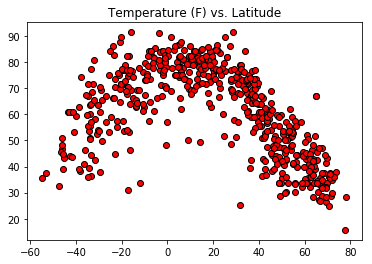

In [19]:
# Producing Plots

#* Temperature (F) vs. Latitude
plt.scatter(weather_df['Latitude'], weather_df["Temperature"], marker='o', facecolors = 'red', edgecolors = 'black')
plt.title('Temperature (F) vs. Latitude')

In [ ]:
#* Humidity (%) vs. Latitude

In [ ]:
#* Cloudiness (%) vs. Latitude

In [ ]:

* Cloudiness (%) vs. Latitude